In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt

Metropolis Algorithm question 1

In [2]:
#boudary conditions
def bc_periodic(i, n): 
    return i % n

def bc_helical(i, j, n):
    if j>=n:
        new_i = (i-1)%n
        new_j = j%n
    elif j<0:
        new_i = (i+1)%n
        new_j = j%n
    else: 
        new_i = i%n
        new_j = j    
    return new_i, new_j

In [3]:
def generate_random_configuration(n):
    return [[random.choice([-1, 1]) for _ in range(n)] for _ in range(n)]

def calculate_energy(matrix, n):
    E = 0
    J = 1
    for i in range(n):
        for j in range(n):
            ni1, nj1 = bc_helical(i + 1, j, n)
            #ni2, nj2 = bc_helical(i - 1, j ,n)
            ni3, nj3 = bc_helical(i, j + 1, n)
            #ni4, nj4 = bc_helical(i, j - 1, n)
            energy_i = -J * matrix[i][j] * (
                matrix[ni1][nj1] +
                #matrix[ni2][nj2] +
                matrix[ni3][nj3]
                #matrix[ni4][nj4]
            )
            
            E += energy_i
    return E


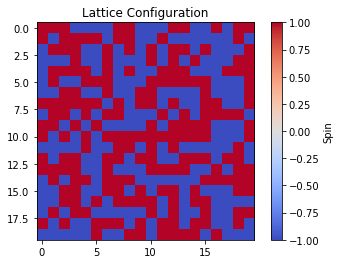

Percentage done: 0.00%
Percentage done: 0.20%
Percentage done: 0.40%
Percentage done: 0.60%
Percentage done: 0.80%
Percentage done: 1.00%
Percentage done: 1.20%
Percentage done: 1.40%
Percentage done: 1.60%
Percentage done: 1.80%
Percentage done: 2.00%
Percentage done: 2.20%
Percentage done: 2.40%
Percentage done: 2.60%
Percentage done: 2.80%
Percentage done: 3.00%
Percentage done: 3.20%
Percentage done: 3.40%
Percentage done: 3.60%
Percentage done: 3.80%
Percentage done: 4.00%
Percentage done: 4.20%
Percentage done: 4.40%
Percentage done: 4.60%
Percentage done: 4.80%
Percentage done: 5.00%
Percentage done: 5.20%
Percentage done: 5.40%
Percentage done: 5.60%
Percentage done: 5.80%
Percentage done: 6.00%
Percentage done: 6.20%
Percentage done: 6.40%
Percentage done: 6.60%
Percentage done: 6.80%
Percentage done: 7.00%
Percentage done: 7.20%
Percentage done: 7.40%
Percentage done: 7.60%
Percentage done: 7.80%
Percentage done: 8.00%
Percentage done: 8.20%
Percentage done: 8.40%
Percentage 

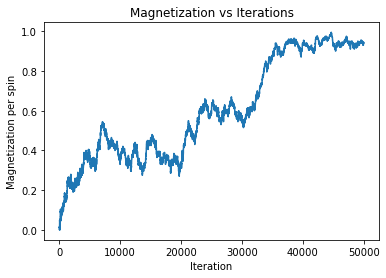

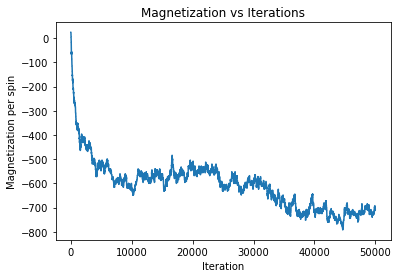

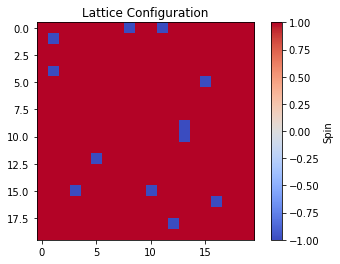

In [12]:
n = 20
k = 50000
T = 2

possible_delta_E = [np.exp(8 / T), 0, np.exp(4 / T), 0, np.exp(0 / T), 0, np.exp(-4 / T), 0, np.exp(-8 / T)]

def plot_lattice(matrix):
    plt.imshow(matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar(label='Spin')
    plt.title('Lattice Configuration')
    plt.show()

def calculate_energy_single_spin(matrix, i, j, n, value):
    J = 1
    ni1, nj1 = bc_helical(i + 1, j, n)
    ni2, nj2 = bc_helical(i - 1, j, n)
    ni3, nj3 = bc_helical(i, j + 1, n)
    ni4, nj4 = bc_helical(i, j - 1, n)
    E = - J * value * (
        matrix[ni1][nj1] +
        matrix[ni2][nj2] +
        matrix[ni3][nj3] +
        matrix[ni4][nj4]
    )
    return E

def calculate_energy_change_on_single_spin(matrix, i, j, n):
    return calculate_energy_single_spin(matrix, i, j, n, -matrix[i][j]) - calculate_energy_single_spin(matrix, i, j, n, matrix[i][j])

# Calculate magnetization per spin
def magnetization_per_spin(matrix):
    return np.abs(np.sum(matrix)) / matrix.size

configuration = np.array(generate_random_configuration(n))
plot_lattice(configuration)
energy = calculate_energy(configuration, n)
energies =[]
magnetizations = []

# Pre-generate random indices and random numbers for the entire loop
random_indices = np.random.randint(0, n, size=(k, 2))
random_numbers = np.random.uniform(0, 1, size=k)

for idx in range(k):
    i, j = random_indices[idx]
    delta_E = calculate_energy_change_on_single_spin(configuration, i, j, n)
    if delta_E <= 0 or random_numbers[idx] <= possible_delta_E[int(delta_E/2 + 4)]:
        configuration[i][j] = -configuration[i][j]
        energy += delta_E
    energies.append(energy)
    magnetizations.append(magnetization_per_spin(configuration))
    if idx % 100 == 0:
        print(f"Percentage done: {(idx / k) * 100:.2f}%")

plt.plot(range(k), magnetizations)
plt.xlabel('Iteration')
plt.ylabel('Magnetization per spin')
plt.title('Magnetization vs Iterations')
plt.show()

plt.plot(range(k), energies)
plt.xlabel('Iteration')
plt.ylabel('Magnetization per spin')
plt.title('Magnetization vs Iterations')
plt.show()

# Plot the final lattice configuration
plot_lattice(configuration)

In [6]:
def m(T, J):
    return (1 - (np.sinh(2 * J / T)**(-4))) ** (1 / 8)

# Example usage
T = 2  # Example temperature
J = 1  # Example value for J
result = m(T, J)
print("m(T) =", result)

print("average magnetization per spin", np.mean(magnetizations))

m(T) = 0.911319377877496
average magnetization per spin 0.7720902999999999


From your plot estimate the equilibration time eq-> around 2*10^6

In [8]:
print(magnetizations[-1])


0.9112


In [9]:
#we take all the configurations after equilibration we estimate the time to equilibrium to be 0.05*10^7
equilibration_index = int(int(2.5*(10**6)))
post_equilibration_configurations = energies[equilibration_index:]

In [10]:
print(len(energies))
print(len(post_equilibration_configurations))

5000000
2500000


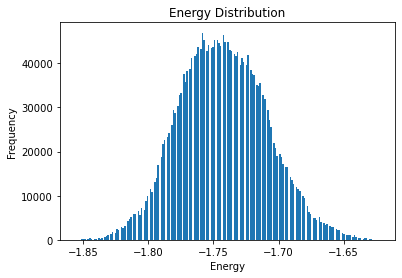

In [17]:
#plot the distribution of energies
normalized_energies = np.array(post_equilibration_configurations)/(n**2)
plt.hist(normalized_energies, bins=200)
plt.title('Energy Distribution')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

For N = 50, calculate the autocorrelation function as a function of time, if
 the temperature is taken to be T = 22. Do this by iterating for a long time,
 and keep track of the magnetizations at each timestep (sweep). Normalize this
 autocorrelation function by dividing by (0).

In [14]:
def autocorrelation(magnetization, t_eq, t_max, x ):
    m_eq = magnetization[t_eq:t_max]  # Discard pre-equilibration data
    m_mean = np.mean(m_eq)  # Compute equilibrium mean
    print("mean at equilibrium:", m_mean)
    autocorrelations = []

    for t in range(t_max):
        print(len(m_eq[:t_max-1]))
        print(len(m_eq[t:]))
        C = np.mean((m_eq[:t_max-x] - m_mean) * (m_eq[t:+x] - m_mean))
        autocorrelations.append(C)

    return autocorrelations/autocorrelations[0]  # Normalize by dividing by C(0)
N = 50  # Lattice size
t_eq = int(2.5*(10**6))  # Equilibration time
t_max = int(5* (10**6)-10)  # Maximum time for autocorrelation calculation
autocorr= []
for x in range(1,10): 
    autocorr.append(autocorrelation(magnetizations, t_eq, t_max, x))

#plot autocorrelation function
plt.plot(autocorr)
plt.xlabel('Time')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')

mean at equilibrium: 0.9084157165428655
2499990
2499990
2499990
2499989


ValueError: operands could not be broadcast together with shapes (2499990,) (0,) 